In [2]:
import ROOT as r
import sys
import os

Welcome to JupyROOT 6.26/10


In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from nearline_helpers import *

In [5]:
import hist
import uproot

In [6]:
t = r.TChain("tree")
t.Add('../bin/*run*root')

77

In [7]:
h = hist.Hist(
    hist.axis.Regular(100,0,100000,label='Integral [arb. u.]'),
    hist.axis.IntCategory(range(5),label='Channel'),
    hist.axis.Regular(1600,-800-0.5,800-0.5,label='Sample Times [c.t.]')
)

In [8]:
def peak_time(w):
    # trace = np.array(w.raw.GetObject().trace)
    trace = w.raw.GetObject().trace
    return list(trace).index(np.amax(trace))

In [14]:
for i, e in enumerate(t):
    for wfi in e.integrals:
        inti = wfi.integral
        # time = peak_time(wfi)
        trace = wfi.raw.GetObject().trace
        time = list(trace).index(np.amax(trace))
        channel = wfi.channelTag
        samples = np.array(range(len(trace))) - time
        print(channel, time, inti,samples[:5], )
        h.fill(trace, channel, samples)
    if(i > 3):
        break

0 236 42076.966666666674 [-236 -235 -234 -233 -232]
3 239 48540.333333333314 [-239 -238 -237 -236 -235]
0 243 42436.399999999965 [-243 -242 -241 -240 -239]
1 242 21840.0 [-242 -241 -240 -239 -238]
3 243 47825.59999999998 [-243 -242 -241 -240 -239]
4 247 31664.533333333326 [-247 -246 -245 -244 -243]
1 240 40695.1333333333 [-240 -239 -238 -237 -236]
3 241 44650.666666666686 [-241 -240 -239 -238 -237]
2 220 11453.0 [-220 -219 -218 -217 -216]
3 225 23127.666666666628 [-225 -224 -223 -222 -221]
4 225 22611.79999999999 [-225 -224 -223 -222 -221]
1 229 36198.0 [-229 -228 -227 -226 -225]
3 227 45199.80000000005 [-227 -226 -225 -224 -223]


ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7fccd1c81e90>, cbar=<matplotlib.colorbar.Colorbar object at 0x7fccd1cded50>, text=[])

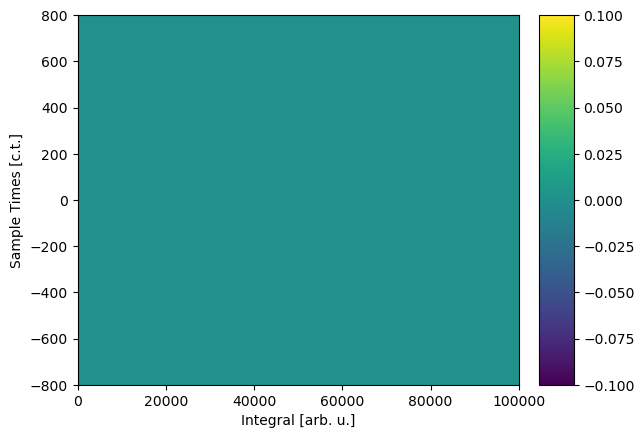

In [15]:
h[:,0j,:].plot()